In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas Profiling for Exploratory Data Analysis (EDA)
!pip install pandas-profiling
import pandas_profiling as pp

# Setting display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.6/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.6/u/import-error

In [2]:
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.shape

(99999, 226)

In [4]:
# Displaying concise summary information about the dataset
# including the number of non-null values and data types of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


The dataset contains 99,999 records and 226 attributes. We'll review the terms used in the dataset by referring to the provided data dictionary.

In [5]:
df_dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

In [6]:
#dictionary items
df_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


Performing preliminary statistical analysis on the dataset to gain initial insights.


In [7]:
#Summarizing numerical attributes Transposing for better presentation Displaying statistics

df.describe().T


,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.116621e+04


In [8]:
unique_1_col = [i for i in df.columns if df[i].nunique() == 1]
df.drop(unique_1_col, axis=1, inplace=True)
print("\nThe following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n", unique_1_col)


The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [9]:
df.shape

(99999, 210)

In [10]:
# Calculate the percentage of missing values in each column and sort in descending order
missing_percent = ((df.isnull().sum() / len(df)) * 100).round(2).sort_values(ascending=False)
missing_percent

max_rech_data_6     74.85
fb_user_6           74.85
count_rech_3g_6     74.85
count_rech_2g_6     74.85
night_pck_user_6    74.85
                    ...  
max_rech_amt_9       0.00
max_rech_amt_8       0.00
max_rech_amt_7       0.00
max_rech_amt_6       0.00
sep_vbc_3g           0.00
Length: 210, dtype: float64

The columns containing datetime values, currently represented as objects, can be converted into datetime format. This conversion will enable the manipulation of the datetime values as dates and times, allowing for various time-based analyses and operations on the data.


In [11]:
# Select columns with datetime format represented as objects
date_columns = df.select_dtypes(include=['object'])

# Display the columns available with datetime format
print("Columns with datetime format represented as object:")
print(date_columns.columns)

# Convert the selected columns to datetime format
for column in date_columns.columns:
    df[column] = pd.to_datetime(df[column])

# Display the current dimensions of the dataset
print("Current dimension of the dataset after converting datetime columns:")
print(df.shape)


Columns with datetime format represented as object:
Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')
Current dimension of the dataset after converting datetime columns:
(99999, 210)


In [29]:
# Check the data types after conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(34)
memory usage: 160.2 MB


## Handling missing values for columns with meaningful attributes.

In [32]:
# Handling missing values with respect to data recharge attributes
df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)


,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,0.0,0.0
2,NaT,0.0,0.0
3,NaT,0.0,0.0
4,2014-06-04,1.0,56.0
5,NaT,0.0,0.0
6,NaT,0.0,0.0
7,NaT,0.0,0.0
8,NaT,0.0,0.0
9,NaT,0.0,0.0



Considering the "date_of_last_rech_data" column, which represents the date of the last recharge for mobile internet in a given month, if both "total_rech_data" and "max_rech_data" have missing values, these can be deemed as meaningful missing values. In this scenario, meaningful missing denotes that the customer hasn't performed any recharge for mobile internet. Therefore, we'll fill these missing values with 0.

Addressing the missing values in the attributes total_rech_data_* and max_rech_data_* for months 6, 7, 8, and 9.

In [33]:
# Code for conditional imputation
start_time = time.time()

for i in range(len(df)):
    # Handling 'total_rech_data' and 'max_rech_data' for month 6
    if pd.isnull((df['total_rech_data_6'][i]) and (df['max_rech_data_6'][i])):
        if pd.isnull(df['date_of_last_rech_data_6'][i]):
            df['total_rech_data_6'][i] = 0
            df['max_rech_data_6'][i] = 0

    # Handling 'total_rech_data' and 'max_rech_data' for month 7
    if pd.isnull((df['total_rech_data_7'][i]) and (df['max_rech_data_7'][i])):
        if pd.isnull(df['date_of_last_rech_data_7'][i]):
            df['total_rech_data_7'][i] = 0
            df['max_rech_data_7'][i] = 0

    # Handling 'total_rech_data' and 'max_rech_data' for month 8
    if pd.isnull((df['total_rech_data_8'][i]) and (df['max_rech_data_8'][i])):
        if pd.isnull(df['date_of_last_rech_data_8'][i]):
            df['total_rech_data_8'][i] = 0
            df['max_rech_data_8'][i] = 0

    # Handling 'total_rech_data' and 'max_rech_data' for month 9
    if pd.isnull((df['total_rech_data_9'][i]) and (df['max_rech_data_9'][i])):
        if pd.isnull(df['date_of_last_rech_data_9'][i]):
            df['total_rech_data_9'][i] = 0
            df['max_rech_data_9'][i] = 0

end_time = time.time()
print("\nExecution Time = ", round(end_time - start_time, 2), "seconds")
print("The columns \n'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'\n'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9' are imputed with 0 based on the condition explained above")



Execution Time =  2.88 seconds
The columns 
'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'
'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9' are imputed with 0 based on the condition explained above


In [34]:
# Displaying the values of related columns
df[['count_rech_2g_6', 'count_rech_3g_6', 'total_rech_data_6']].head(10)


,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


The table shows that the values in the 'total_rech_data' columns for each month (6 to 9) are obtained by adding the values in the corresponding 'count_rech_2g' and 'count_rech_3g' columns. This creates multicollinearity, which can be addressed by dropping the 'count_rech_2g' and 'count_rech_3g' columns for each month (6 to 9).

In [35]:
# Dropping Columns Indicative of 2G and 3G Recharges
df.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'], axis=1, inplace=True)

print("Columns 'count_rech_2g_6' to 'count_rech_3g_9' are dropped as they are redundant with 'total_rech_data' column.")


Columns 'count_rech_2g_6' to 'count_rech_3g_9' are dropped as they are redundant with 'total_rech_data' column.


In [36]:
df.shape

(99999, 202)

#### Handling missing values for the "arpu_3g_*" and "arpu_2g_*" attributes for the months 6, 7, 8, and 9.

In [37]:
# Checking the related columns values in the telecom_data DataFrame
df[['arpu_3g_6', 'arpu_2g_6', 'av_rech_amt_data_6']].head(10)


,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [38]:
# Displaying correlation tables for the specified columns across months 6, 7, 8, and 9
print("Correlation tables for Month 6\n\n", df[['arpu_3g_6', 'arpu_2g_6', 'av_rech_amt_data_6']].corr())
print("\nCorrelation tables for Month 7\n\n", df[['arpu_3g_7', 'arpu_2g_7', 'av_rech_amt_data_7']].corr())
print("\nCorrelation tables for Month 8\n\n", df[['arpu_3g_8', 'arpu_2g_8', 'av_rech_amt_data_8']].corr())
print("\nCorrelation tables for Month 9\n\n", df[['arpu_3g_9', 'arpu_2g_9', 'av_rech_amt_data_9']].corr())


Correlation tables for Month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation tables for Month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation tables for Month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation tables for Month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9  

In [39]:
# Dropping the 'arpu_3g_*' and 'arpu_2g_*' columns for months 6, 7, 8, and 9 from the dataset
df.drop(['arpu_3g_6', 'arpu_2g_6',
                   'arpu_3g_7', 'arpu_2g_7',
                   'arpu_3g_8', 'arpu_2g_8',
                   'arpu_3g_9', 'arpu_2g_9'], axis=1, inplace=True)

# Printing a message confirming the dropped columns
print("\nThe columns 'arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8', 'arpu_3g_9', 'arpu_2g_9' are dropped from the dataset due to high correlation between their respective arpu_* variables.\n")



The columns 'arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8', 'arpu_3g_9', 'arpu_2g_9' are dropped from the dataset due to high correlation between their respective arpu_* variables.



In [40]:
df.shape

(99999, 194)

#### Dealing with attributes having a greater percentage of missing values.







The columns `fb_user_*` and `night_pck_user_*` for each month from 6 to 9 respectively have missing values exceeding 50%, and they do not appear to contribute any meaningful information for data interpretation. Therefore, we can eliminate these columns for further analysis.

In [41]:
# Dropping columns with high missing values and negligible significance
df.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
                  'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9'],
                  axis=1, inplace=True)

# Printing a message confirming the dropped columns
print("\nThe columns 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9' have been removed from the dataset due to their lack of meaningful contribution and high missing values exceeding 50%.\n")



The columns 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9' have been removed from the dataset due to their lack of meaningful contribution and high missing values exceeding 50%.



In [42]:
df.shape

(99999, 186)

### Managing the absence of values in the attributes `av_rech_amt_data_*` for months 6, 7, 8, and 9.

In [43]:
# Displaying values of related columns in the telecom_data DataFrame
df[['av_rech_amt_data_7', 'max_rech_data_7', 'total_rech_data_7']].head(10)


,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,177.0,154.0,2.0
9,154.0,154.0,1.0


It can be inferred from the table above that if the `total_rech_data_*` column for each month from 6 to 9 is 0, then the missing values in the `av_rech_amt_data_*` column for those months can be replaced with 0. This means that if there is no data recharge activity, the average recharge amount should also be considered as 0.

In [44]:
# Start timer
start_time = time.time()

# Conditional imputation loop
for i in range(len(df)):
    # Handling `av_rech_amt_data` for month 6
    if pd.isnull(df['av_rech_amt_data_6'][i]) and df['total_rech_data_6'][i] == 0:
        df['av_rech_amt_data_6'][i] = 0

    # Handling `av_rech_amt_data` for month 7
    if pd.isnull(df['av_rech_amt_data_7'][i]) and df['total_rech_data_7'][i] == 0:
        df['av_rech_amt_data_7'][i] = 0

    # Handling `av_rech_amt_data` for month 8
    if pd.isnull(df['av_rech_amt_data_8'][i]) and df['total_rech_data_8'][i] == 0:
        df['av_rech_amt_data_8'][i] = 0

    # Handling `av_rech_amt_data` for month 9
    if pd.isnull(df['av_rech_amt_data_9'][i]) and df['total_rech_data_9'][i] == 0:
        df['av_rech_amt_data_9'][i] = 0

# End timer
end_time = time.time()

# Print execution time
print("\nExecution Time =", round(end_time - start_time, 2), "seconds")
print("\nThe columns 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', and 'av_rech_amt_data_9' have been imputed with 0 based on the condition specified.\n")



Execution Time = 142.19 seconds

The columns 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', and 'av_rech_amt_data_9' have been imputed with 0 based on the condition specified.



In [46]:
# Checking the percentage of missing values in the entire dataset
missing_percentage = ((df.isnull().sum() / df.shape[0]) * 100).round(2)
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
missing_percentage_sorted

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                  7.75
                            ...  
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
sep_vbc_3g                   0.00
Length: 186, dtype: float64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


### From the above findings, it is evident that the `date_of_last_rech_data_*` columns for months 6, 7, 8, and 9 are rendered redundant following the completion of conditional imputation based on `total_rech_data_*` and `max_rech_data_*` columns. Moreover, these columns exhibit a high percentage of missing values, indicating their limited utility. Hence, it is recommended to remove these columns from the dataset.

In [48]:
# Dropping columns related to datetime data type from the dataset
df.drop(["date_of_last_rech_data_6", "date_of_last_rech_data_7",
                   "date_of_last_rech_data_8", "date_of_last_rech_data_9"], axis=1, inplace=True)

# Printing a message confirming the dropped columns
print("\nThe columns 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9' have been dropped as they are not significant for the data.\n")



The columns 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9' have been dropped as they are not significant for the data.



#### As we cannot utilize the datetime information anymore, it's appropriate to remove the `date_of_last_rech_data_*` columns for months 6, 7, 8, and 9 accordingly.

In [49]:
# Dropping columns related to datetime data type from the dataset
df.drop(["date_of_last_rech_6", "date_of_last_rech_7",
                   "date_of_last_rech_8", "date_of_last_rech_9"], axis=1, inplace=True)

# Printing a message confirming the dropped columns
print("\nThe columns 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9' have been dropped as they are not significant for the data.\n")



The columns 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9' have been dropped as they are not significant for the data.



In [50]:
df.shape

(99999, 178)

#### After ensuring that the columns used to identify High-Value Customers are free of null values, we can filter the entire dataset and subsequently address any remaining missing values for each column.

### Identifying High-Value Customers during the Good Phase


In [54]:
# Filtering the data based on total revenue generated per customer

# Calculating the total recharge amount done for data alone in months 6, 7, 8, and 9
df['total_rech_amt_data_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_amt_data_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']

# Calculating the overall recharge amount for months 6, 7, 8, and 9
df['overall_rech_amt_6'] = df['total_rech_amt_data_6'] + df['total_rech_amt_6']
df['overall_rech_amt_7'] = df['total_rech_amt_data_7'] + df['total_rech_amt_7']

# Calculating the average recharge done by customers in months June and July (6th and 7th month)
df['avg_rech_amt_6_7'] = (df['overall_rech_amt_6'] + df['overall_rech_amt_7']) / 2

# Finding the 70th percentile value in the overall revenues, defining the criteria for High Value Customers
cut_off = df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is:", cut_off, "\n")

# Filtering the data to retain only the top 30% considered as High Value Customers
df = df[df['avg_rech_amt_6_7'] >= cut_off]



The 70th quantile value to determine the High Value Customer is: 478.0 



In [55]:
df.shape

(30001, 183)

#### The dataset now comprises approximately 30,000 customers who meet the criteria for High-Value customers, forming the basis for the model development.


In [56]:
# Checking the percentage of missing values again for the High-Value Customer group
missing_percentage_hvc = ((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending=False)
missing_percentage_hvc


loc_ic_t2f_mou_9    6.34
spl_og_mou_9        6.34
loc_og_t2m_mou_9    6.34
loc_og_t2f_mou_9    6.34
loc_ic_t2t_mou_9    6.34
                    ... 
max_rech_amt_8      0.00
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
avg_rech_amt_6_7    0.00
Length: 183, dtype: float64

#### The remaining attributes with missing values can be filled using advanced imputation techniques such as `KNNImputer`.

In [57]:
# Retrieving the numerical columns available in the dataset
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_col


['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [58]:
# Importing libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Scaling and transforming the numerical columns
df[num_col] = scaler.fit_transform(df[num_col])

# Initializing the KNN Imputer
knn = KNNImputer(n_neighbors=3)

# Imputing NaN values using KNN Imputer
start_time = time.time()
telecom_data_knn = pd.DataFrame(knn.fit_transform(df[num_col]))
telecom_data_knn.columns = df[num_col].columns
end_time = time.time()
print("\nExecution Time =", round(end_time - start_time, 2), "seconds\n")



Execution Time = 127.12 seconds



In [59]:
# Checking for any remaining null values after imputation for numerical columns
telecom_data_knn.isnull().sum().sum()


0

#### The KNN Imputer has effectively replaced all missing values in the numerical columns using the K-nearest neighbors algorithm.

In [60]:
# Restoring the scaled numerical columns to their original values
df[num_col] = scaler.inverse_transform(telecom_data_knn)

# Displaying the top 10 rows of the dataset
df.head(10)


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,315.0,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,720.0,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,604.0,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.000000,0.00,0.000000,0.00,...,1328.0,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5
38,7.000815e+09,363.987,486.558,393.909,391.709,248.99,619.960000,666.38,494.790000,88.86,...,1155.0,0.00,0.00,0.00,0.00,0.0,0.0,420.0,636.0,528.0
41,7.000721e+09,482.832,425.764,229.769,143.596,86.39,118.880000,80.44,40.060000,232.36,...,2010.0,0.00,0.00,0.00,0.00,0.0,0.0,496.0,510.0,503.0
48,7.000294e+09,1873.271,575.927,179.218,1189.744,2061.69,881.430000,156.91,1589.230000,1087.76,...,1265.0,0.00,0.00,0.00,0.00,0.0,0.0,2317.0,580.0,1448.5
53,7.002189e+09,978.077,1141.296,706.020,1076.247,135.14,119.590000,102.69,99.830000,479.31,...,697.0,0.00,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0


In [61]:
# Checking the overall percentage of missing values in the dataset
missing_percentage_total = ((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending=False)
missing_percentage_total


mobile_number       0.0
isd_ic_mou_8        0.0
ic_others_6         0.0
ic_others_7         0.0
ic_others_8         0.0
                   ... 
spl_og_mou_8        0.0
spl_og_mou_9        0.0
og_others_6         0.0
og_others_7         0.0
avg_rech_amt_6_7    0.0
Length: 183, dtype: float64

In [62]:
# Reconfirming for any remaining missing values
df.isnull().sum().sum()


0

### ***Establishing the Churn Variable***

As previously mentioned in the introduction, we are defining churn based on usage for this model.

To accomplish this, we will derive the churn variable using attributes such as `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9`, and `vol_3g_mb_9`.

In [64]:
# Selecting the columns to define the churn variable (i.e., TARGET Variable)
churn_col = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
df[churn_col].info()


<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [65]:
# Initializing the churn variable
df['churn'] = 0

# Imputing the churn values based on the condition
df['churn'] = np.where(df[churn_col].sum(axis=1) == 0, 1, 0)


In [66]:
# Displaying the top 10 rows of the dataset
df.head(10)


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.000000,0.00,0.000000,0.00,...,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5,0
38,7.000815e+09,363.987,486.558,393.909,391.709,248.99,619.960000,666.38,494.790000,88.86,...,0.00,0.00,0.00,0.00,0.0,0.0,420.0,636.0,528.0,0
41,7.000721e+09,482.832,425.764,229.769,143.596,86.39,118.880000,80.44,40.060000,232.36,...,0.00,0.00,0.00,0.00,0.0,0.0,496.0,510.0,503.0,0
48,7.000294e+09,1873.271,575.927,179.218,1189.744,2061.69,881.430000,156.91,1589.230000,1087.76,...,0.00,0.00,0.00,0.00,0.0,0.0,2317.0,580.0,1448.5,0
53,7.002189e+09,978.077,1141.296,706.020,1076.247,135.14,119.590000,102.69,99.830000,479.31,...,0.00,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0,0


churn
0    91.863605
1     8.136395
Name: count, dtype: float64


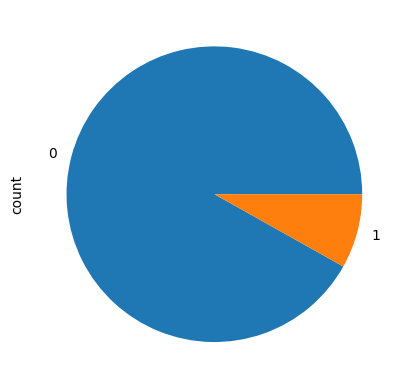

In [67]:
# Finding out the churn/non-churn percentage
print((df['churn'].value_counts() / len(df)) * 100)

# Plotting the churn/non-churn percentage as a pie chart
((df['churn'].value_counts() / len(df)) * 100).plot(kind="pie")
plt.show()


####  ***Observing that 91% of the customers do not churn, it indicates a potential issue with class imbalance.*** <br>

#### As the `churn` variable serves as the target variable, all columns associated with this variable (i.e., all columns with the suffix `_9`) can be removed from the dataset.

In [68]:
# Determining columns associated with the churn phase for exclusion
churn_phase_columns = [col for col in df.columns if '_9' in col]
print("The columns linked to the churn phase are:\n", churn_phase_columns)


The columns linked to the churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [70]:
# Eliminating the chosen churn phase columns
df.drop(churn_phase_columns, axis=1, inplace=True)

# Reporting the updated dimensions of the dataset after removing the churn-related columns
df.shape


(30001, 141)

To further refine the data, we can consider removing additional columns associated with the good phase.

Since we previously derived some columns during the good phase, we can now drop those related columns.

In [72]:

# Dropping columns related to total recharge amount and average recharge amount for data in months 6 and 7
df.drop(['total_rech_amt_data_6', 'av_rech_amt_data_6',
                   'total_rech_data_6', 'total_rech_amt_6',
                   'total_rech_amt_data_7', 'av_rech_amt_data_7',
                   'total_rech_data_7', 'total_rech_amt_7'], axis=1, inplace=True)


*Additionally, we can generate new columns to define the variables for the good phase and subsequently remove the individual 6th and 7th month variables.*

<br>**Before proceeding to address the remaining missing values, let's examine the collinearity among the independent variables and analyze their dependencies.**<br>

In [74]:
# Generating lists of column names for each month (June)
month_6_columns = [col for col in df.columns if '_6' in col]

# Generating lists of column names for each month (July)
month_7_columns = [col for col in df.columns if '_7' in col]

# Generating lists of column names for each month (August)
month_8_columns = [col for col in df.columns if '_8' in col]


In [84]:
# Checking for correlation among the independent variables and identifying highly correlated ones
correlation_matrix = df.corr()

# Excluding the diagonal and upper triangle to avoid duplicate correlations
correlation_matrix.loc[:, :] = np.tril(correlation_matrix, k=-1)

# Stacking the lower triangle of the correlation matrix to create a Series
correlation_matrix = correlation_matrix.stack()

# Filtering correlations above 0.80 or below -0.80 to identify highly correlated variables
correlation_matrix[(correlation_matrix > 0.80) | (correlation_matrix < -0.80)].sort_values(ascending=False)


total_rech_amt_8    arpu_8                0.955351
isd_og_mou_8        isd_og_mou_7          0.943433
                    isd_og_mou_6          0.919641
isd_og_mou_7        isd_og_mou_6          0.916237
sachet_2g_8         total_rech_data_8     0.900629
total_ic_mou_6      loc_ic_mou_6          0.895099
total_ic_mou_8      loc_ic_mou_8          0.893072
total_ic_mou_7      loc_ic_mou_7          0.883070
std_og_t2t_mou_8    onnet_mou_8           0.860483
std_og_t2t_mou_7    onnet_mou_7           0.860275
std_og_t2t_mou_6    onnet_mou_6           0.859593
avg_rech_amt_6_7    overall_rech_amt_7    0.856275
std_og_t2m_mou_7    offnet_mou_7          0.854685
std_og_t2m_mou_8    offnet_mou_8          0.851049
total_og_mou_8      std_og_mou_8          0.848858
total_og_mou_7      std_og_mou_7          0.848825
loc_ic_mou_8        loc_ic_t2m_mou_8      0.847512
std_ic_mou_8        std_ic_t2m_mou_8      0.845590
loc_ic_mou_6        loc_ic_t2m_mou_6      0.844418
loc_og_mou_8        loc_og_mou_

In [86]:
# List of columns to be dropped due to high collinearity with other predictor variables
columns_to_drop = ['total_rech_amt_8', 'isd_og_mou_8', 'isd_og_mou_7', 'sachet_2g_8', 'total_ic_mou_6',
               'total_ic_mou_8', 'total_ic_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2t_mou_7',
               'std_og_t2m_mou_7', 'std_og_t2m_mou_8']

# These columns are considered for removal due to high collinearity with other predictor variables.
# The criteria set for collinearity is 85%.

# Dropping the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)


In [87]:
df.shape

(30001, 121)

### Creating new variables to gain insights into the dataset.

In [89]:
# We have a column called 'aon'

# We can create new variables based on this column to gain insights into churn.

# Creating a new variable named 'tenure'
df['tenure'] = (df['aon'] / 30).round(0)

# Since we've derived a new column from 'aon', we can remove it
df.drop('aon', axis=1, inplace=True)


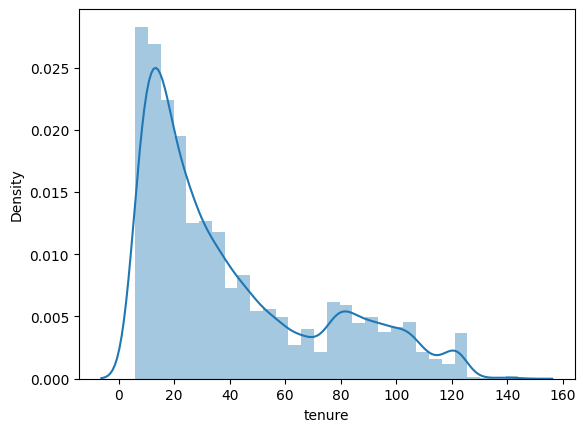

In [91]:
# Visualizing the distribution of the tenure variable
sns.distplot(df['tenure'], bins=30)
plt.show()


In [92]:
# Defining tenure ranges and corresponding labels
tenure_ranges = [0, 6, 12, 24, 60, 61]
tenure_labels = ['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']

# Creating a new column 'tenure_range' based on the tenure ranges defined
df['tenure_range'] = pd.cut(df['tenure'], tenure_ranges, labels=tenure_labels)

# Displaying the first few rows of the new column
df['tenure_range'].head()


0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

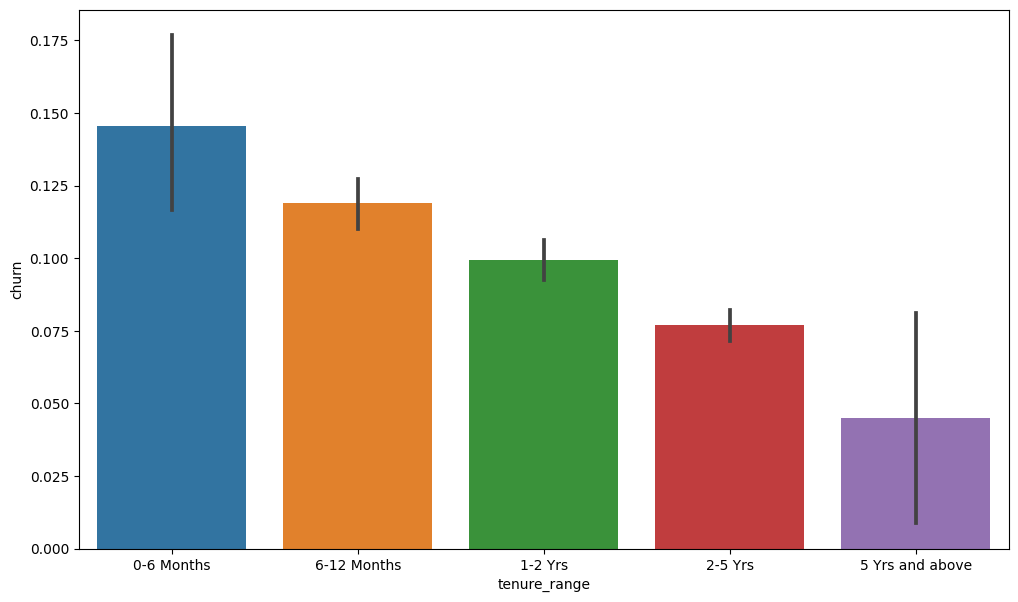

In [93]:
# Creating a bar plot for tenure range vs. churn
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range', y='churn', data=df)
plt.show()

### The bar plot reveals that the highest churn rate occurs within the initial 0-6 month period, gradually decreasing as customers remain with the network.

#### We determine the customer's good phase by considering the average revenue per user (ARPU) for months 6 and 7, represented by arpu_6 and arpu_7. As we have two separate averages, we'll compute their average and discard the other columns.

In [94]:
# Computing the average ARPU for months 6 and 7
df["avg_arpu_6_7"] = (df['arpu_6'] + df['arpu_7']) / 2

# Displaying the first few values of the new average ARPU column
df['avg_arpu_6_7'].head()


0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_6_7, dtype: float64

In [95]:
# Dropping the original ARPU columns as they are now represented by a new derived column
df.drop(['arpu_6', 'arpu_7'], axis=1, inplace=True)

# Displaying the current dimensions of the dataset after dropping the columns
print("Current dataset dimensions after dropping columns:", df.shape)


Current dataset dimensions after dropping columns: (30001, 121)


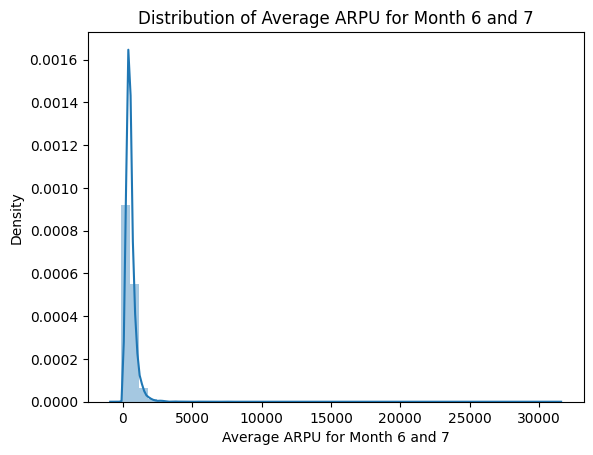

In [96]:
# Plotting the distribution of the newly created column 'avg_arpu_6_7'
sns.distplot(df['avg_arpu_6_7'])
plt.xlabel('Average ARPU for Month 6 and 7')
plt.ylabel('Density')
plt.title('Distribution of Average ARPU for Month 6 and 7')
plt.show()


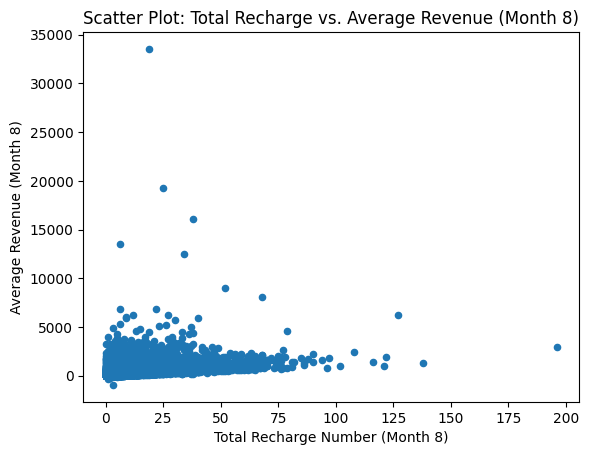

In [101]:
# Scatter plot between total recharge and average revenue for the 8th month
df[['total_rech_num_8', 'arpu_8']].plot.scatter(x='total_rech_num_8', y='arpu_8')
plt.title('Scatter Plot: Total Recharge vs. Average Revenue (Month 8)')
plt.xlabel('Total Recharge Number (Month 8)')
plt.ylabel('Average Revenue (Month 8)')
plt.show()


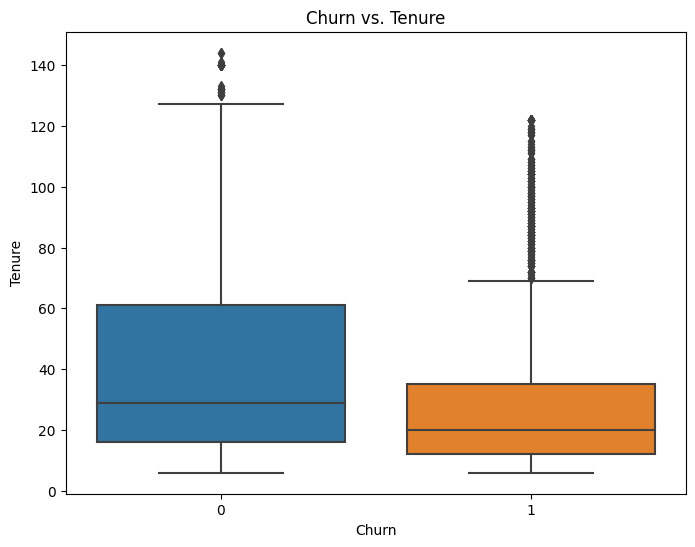

In [102]:
# Box plot to visualize churn with respect to tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['churn'], y=df['tenure'])
plt.title('Churn vs. Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


#### **The box plot illustrates that customers with longer tenure tend to have lower churn rates, indicating they are more likely to continue using telecom services.**

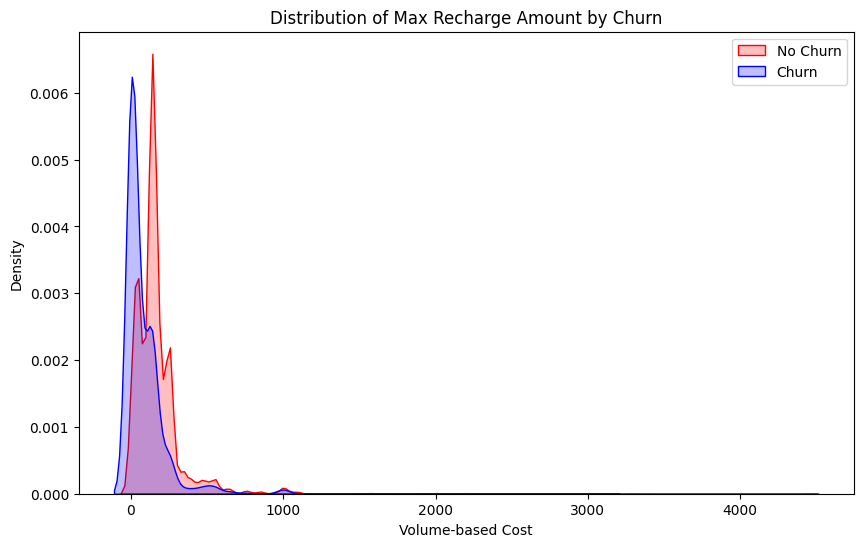

In [103]:
# Plotting the distribution of max recharge amount based on churn status
plt.figure(figsize=(10, 6))

# Kernel Density Estimate (KDE) plot for churn = 0 (No Churn)
sns.kdeplot(df.max_rech_amt_8[(df["churn"] == 0)], color="red", shade=True)

# KDE plot for churn = 1 (Churn)
sns.kdeplot(df.max_rech_amt_8[(df["churn"] == 1)], color="blue", shade=True)

# Adding labels and title
plt.legend(["No Churn", "Churn"], loc='upper right')
plt.ylabel('Density')
plt.xlabel('Volume-based Cost')
plt.title('Distribution of Max Recharge Amount by Churn')
plt.show()


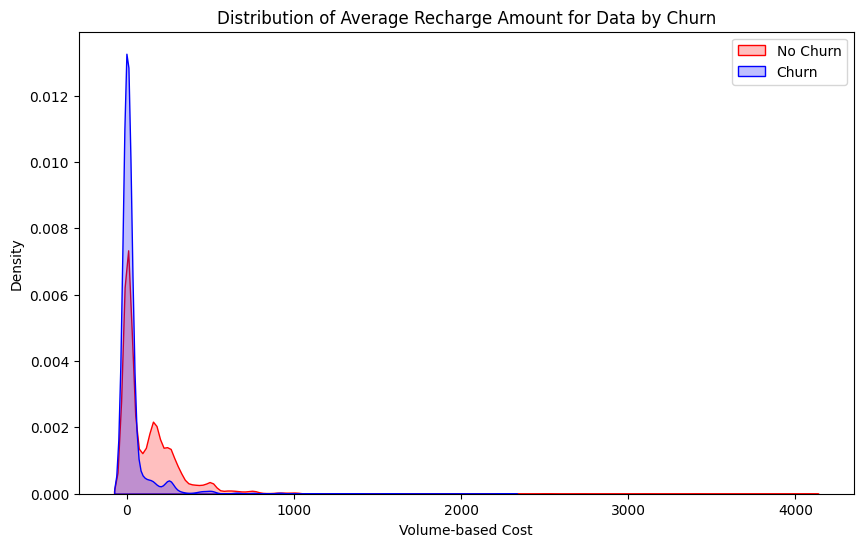

In [104]:
# Plotting the distribution of average recharge amount for data based on churn status
plt.figure(figsize=(10, 6))

# Kernel Density Estimate (KDE) plot for churn = 0 (No Churn)
sns.kdeplot(df.av_rech_amt_data_8[(df["churn"] == 0)], color="red", shade=True)

# KDE plot for churn = 1 (Churn)
sns.kdeplot(df.av_rech_amt_data_8[(df["churn"] == 1)], color="blue", shade=True)

# Adding labels and title
plt.legend(["No Churn", "Churn"], loc='upper right')
plt.ylabel('Density')
plt.xlabel('Volume-based Cost')
plt.title('Distribution of Average Recharge Amount for Data by Churn')
plt.show()


In [105]:
# Creating categories for month 8 column total recharge and their count
df['total_rech_data_group_8'] = pd.cut(df['total_rech_data_8'], bins=[-1, 0, 10, 25, 100],
                                                 labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"])
df['total_rech_num_group_8'] = pd.cut(df['total_rech_num_8'], bins=[-1, 0, 10, 25, 1000],
                                                labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"])


Distribution of total_rech_data_8 variable:
 total_rech_data_group_8
<=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: count, dtype: int64


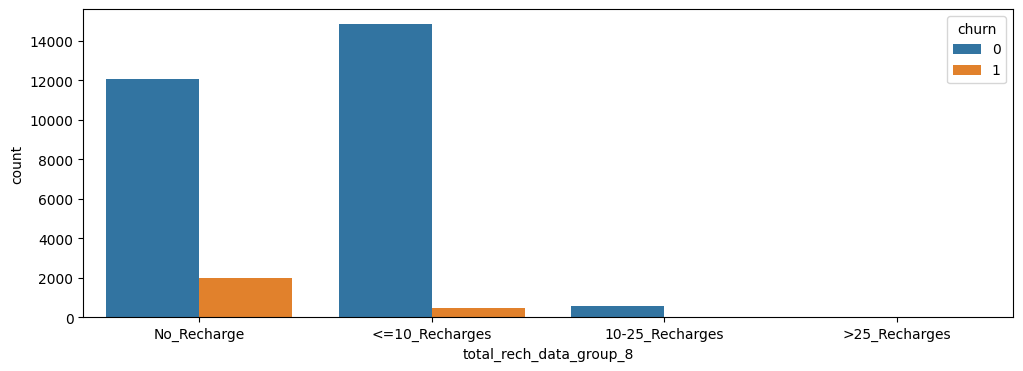

Distribution of total_rech_num_8 variable:
 total_rech_num_group_8
<=10_Recharges     19349
10-25_Recharges     8073
>25_Recharges       1996
No_Recharge          583
Name: count, dtype: int64


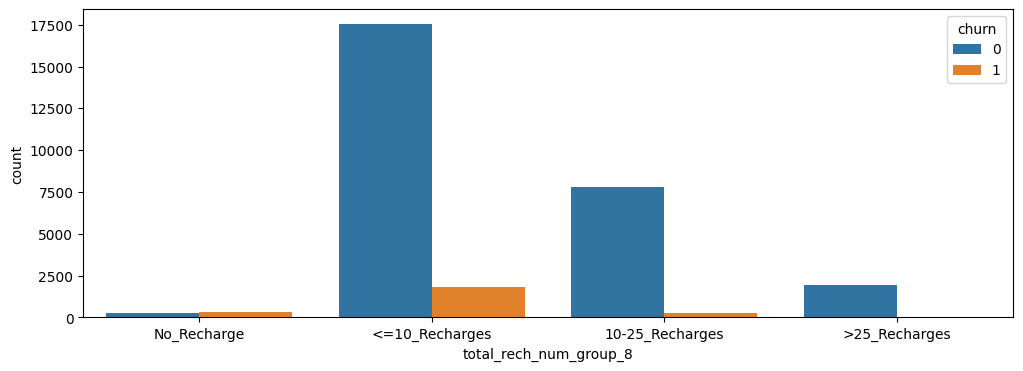

In [106]:
# Plotting the distribution of total_rech_data_8 variable
plt.figure(figsize=[12,4])
sns.countplot(data=df, x="total_rech_data_group_8", hue="churn")
print("Distribution of total_rech_data_8 variable:\n", df['total_rech_data_group_8'].value_counts())
plt.show()

# Plotting the distribution of total_rech_num_8 variable
plt.figure(figsize=[12,4])
sns.countplot(data=df, x="total_rech_num_group_8", hue="churn")
print("Distribution of total_rech_num_8 variable:\n", df['total_rech_num_group_8'].value_counts())
plt.show()


In [107]:
# Creating dummy variables for categorical columns and dropping the first one
dummy = pd.get_dummies(df[['total_rech_data_group_8', 'total_rech_num_group_8', 'tenure_range']], drop_first=True)
dummy.head()


,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,True,False,False,True,False,False,False,False,True,False
7,False,False,False,True,False,False,False,False,True,False
8,True,False,False,False,True,False,True,False,False,False
21,False,False,False,False,False,True,False,True,False,False
23,True,False,False,True,False,False,False,True,False,False


In [108]:
# Merging the dummy variables with the original dataset
df = pd.concat([df, dummy], axis=1)

# Displaying the first few rows of the updated dataset
df.head()


,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,...,True,False,False,True,False,False,False,False,True,False
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,...,False,False,False,True,False,False,False,False,True,False
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,...,True,False,False,False,True,False,True,False,False,False
21,7.002124e+09,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,...,False,False,False,False,False,True,False,True,False,False
23,7.000887e+09,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,...,True,False,False,True,False,False,False,True,False,False


In [109]:
# Creating a copy of the filtered dataframe
df2 = df[:].copy()

# Dropping unwanted columns
df2.drop(['tenure_range', 'mobile_number', 'total_rech_data_group_8', 'total_rech_num_group_8', 'sep_vbc_3g', 'tenure'], axis=1, inplace=True)

# Displaying the first few rows of the updated dataset
df2.head()


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,...,True,False,False,True,False,False,False,False,True,False
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,...,False,False,False,True,False,False,False,False,True,False
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,...,True,False,False,False,True,False,True,False,False,False
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,...,False,False,False,False,False,True,False,True,False,False
23,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,0.00,...,True,False,False,True,False,False,False,True,False,False


In [113]:
# Creating X dataset for model building, excluding the 'churn' column
X = df2.drop(['churn'], axis=1)

# Displaying the first few rows of the X dataset
X.head()


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,...,True,False,False,True,False,False,False,False,True,False
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,...,False,False,False,True,False,False,False,False,True,False
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,...,True,False,False,False,True,False,True,False,False,False
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,...,False,False,False,False,False,True,False,True,False,False
23,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,0.00,...,True,False,False,True,False,False,False,True,False,False


In [112]:
# Creating y dataset for model building, containing only the 'churn' column
y = df2['churn']

# Displaying the first few rows of the y dataset
y.head()


0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [114]:
# Splitting the dataset into train and test sets
# Here, X_train and X_test contain the features, while y_train and y_test contain the target variable 'churn'
from sklearn.model_selection import train_test_split

# Using 70% of the data for training and 30% for testing, with a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# Displaying the dimensions of the train and test datasets
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test:", X_test.shape)


Dimensions of X_train: (21000, 126)
Dimensions of X_test: (9001, 126)


In [115]:
# Displaying the information about the features in the training dataset
X_train.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 15709 to 99093
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   loc_o

In [117]:
# Selecting numerical columns from the training dataset
num_coll = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [118]:
# Scaling the numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Scaling the numerical columns in the training dataset
X_train[num_col] = scaler.fit_transform(X_train[num_col])


In [119]:
# Displaying the first few rows of the transformed training dataset
X_train.head()


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
15709,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,...,True,False,False,True,False,False,False,False,False,False
28202,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,...,True,False,False,True,False,False,False,False,True,False
14943,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,...,True,False,False,False,True,False,True,False,False,False
92007,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,0.029033,0.0,...,True,False,False,True,False,False,False,False,True,False
56403,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,0.000000,0.0,...,False,False,False,False,True,False,False,True,False,False


### Addressing Data Imbalance

#### **By employing the SMOTE technique, we can rectify the data imbalance with respect to the churn variable and advance with the analysis.**

In [121]:
# Applying Synthetic Minority Over-sampling Technique (SMOTE) to balance the data
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Initialize SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [123]:
# Displaying the dimensions of the balanced training dataset after applying SMOTE
print("Dimensions of X_train_sm:", X_train_resampled.shape)
print("Dimensions of y_train_sm:", y_train_resampled.shape)


Dimensions of X_train_sm: (38576, 126)
Dimensions of y_train_sm: (38576,)


### Logistic Regression

In [124]:
# Importing required libraries for model creation
import statsmodels.api as sm


In [129]:
# Fit logistic regression model again
# Example:
logistic_model = sm.GLM(y_train_resampled, (sm.add_constant(X_train_resampled)), family=sm.families.Binomial())
logistic_model_summary = logistic_model.fit().summary()
print(logistic_model_summary)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#### Logistic Regression with Recursive Feature Elimination (RFE) Technique

In [132]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

from sklearn.feature_selection import RFE

# Applying Recursive Feature Elimination (RFE) with 20 variables as output
rfe = RFE(estimator=logistic_regression, n_features_to_select=20)             
rfe = rfe.fit(X_train_resampled, y_train_resampled)


In [134]:
# The selected features by RFE
rfe.support_


array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [135]:
# Extracting the names of selected columns by RFE
rfe_columns = X_train_resampled.columns[rfe.support_]
print("Selected columns by RFE for modeling:\n\n", rfe_columns)


Selected columns by RFE for modeling:

 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [136]:
# Generating tuples containing column names, support status, and ranking by RFE
feature_rfe_info = list(zip(X_train_resampled.columns, rfe.support_, rfe.ranking_))
feature_rfe_info


[('arpu_8', True, 1),
 ('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 29),
 ('onnet_mou_8', False, 48),
 ('offnet_mou_6', False, 31),
 ('offnet_mou_7', False, 21),
 ('offnet_mou_8', False, 34),
 ('roam_ic_mou_6', False, 14),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 59),
 ('roam_og_mou_6', False, 70),
 ('roam_og_mou_7', False, 32),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 62),
 ('loc_og_t2t_mou_7', False, 94),
 ('loc_og_t2t_mou_8', False, 20),
 ('loc_og_t2m_mou_6', False, 78),
 ('loc_og_t2m_mou_7', False, 67),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 106),
 ('loc_og_t2f_mou_7', False, 6),
 ('loc_og_t2f_mou_8', False, 24),
 ('loc_og_t2c_mou_6', False, 8),
 ('loc_og_t2c_mou_7', False, 63),
 ('loc_og_t2c_mou_8', False, 105),
 ('loc_og_mou_6', False, 46),
 ('loc_og_mou_7', False, 103),
 ('loc_og_mou_8', False, 3),
 ('std_og_t2m_mou_6', False, 97),
 ('std_og_t2f_mou_6', False, 85),
 ('std_og_t2f_mou_7', False, 27),
 ('std_og_t2f_mou_8',

#### Evaluating the Model Using StatsModels

In [137]:
# Adding a constant to the features selected by RFE
X_train_Resampled = sm.add_constant(X_train_resampled[rfe_columns])

# Fitting a logistic regression model using StatsModels
logm2 = sm.GLM(y_train_resampled, X_train_Resampled, family=sm.families.Binomial())
res = logm2.fit()

# Displaying the summary of the model
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15858.
Date:                Fri, 09 Feb 2024   Deviance:                       31716.
Time:                        22:25:45   Pearson chi2:                 8.84e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4311
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5734      0.070      8.157      0.000       0.436       0.711
arpu_8                -7.6024      1.293     -5.878      0.000     -10.137      -5.067
roam_ic_mou_7          8.3041      0.926      8.966      0.000       6.489      10.119
roam_og_mou_8          4.3928      0.603      7.291      0.000       3.212       5.574
loc_og_t2m_mou_8      -3.8992      0.672     -5.801      0.000      -5.217      -2.582
std_og_mou_7           7.7442      0.513     15.093      0.000       6.739       8.750
total_og_mou_8       -20.2748      0.957    -21.179      0.000     -22.151     -18.398
loc_ic_t2t_mou_8       2.2633      4.058      0.558      0.577      -5.691      10.217
loc_ic_t2m_mou_6       7.7942      0.631     12.356      0.000       6.558       9.031
loc_ic_t2m_mou_8      -6.9846      4.480     -1.559      0.119     -15.766       1.797
loc_ic_mou_8         -25.9694      4.981     -5.214      0.000     -35.731     -16.208
std_ic_mou_8         -11.8906      1.359     -8.752      0.000     -14.553      -9.228
spl_ic_mou_8         -19.9286      1.376    -14.482      0.000     -22.626     -17.231
total_rech_num_8      -7.1376      0.534    -13.374      0.000      -8.184      -6.092
last_day_rch_amt_8   -18.3232      0.813    -22.533      0.000     -19.917     -16.729
total_rech_data_8     -8.8801      0.612    -14.518      0.000     -10.079      -7.681
av_rech_amt_data_8    -5.2960      0.644     -8.219      0.000      -6.559      -4.033
vol_2g_mb_8          -10.5419      0.934    -11.283      0.000     -12.373      -8.711
monthly_2g_8          -5.7619      0.360    -16.022      0.000      -6.467      -5.057
aug_vbc_3g            -6.8512      0.588    -11.647      0.000      -8.004      -5.698
avg_arpu_6_7          18.4410      1.084     17.012      0.000      16.316      20.566
======================================================================================
"""

In [138]:
# Dropping the column 'loc_ic_t2t_mou_8' from the selected features
rfe_columns_1 = rfe_columns.drop('loc_ic_t2t_mou_8', 1)

# Displaying the new set of edited features
print("\nThe new set of edited featured are:\n", rfe_columns_1)



The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')


In [140]:
# Adding a constant to the edited feature list for training the model
X_train_Resampled = sm.add_constant(X_train_resampled[rfe_columns_1])

# Fitting the logistic regression model with the edited feature list
logm2 = sm.GLM(y_train_resampled, X_train_Resampled, family=sm.families.Binomial())
res = logm2.fit()

# Displaying the summary of the trained model
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15858.
Date:                Fri, 09 Feb 2024   Deviance:                       31717.
Time:                        22:33:57   Pearson chi2:                 8.96e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4311
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5725      0.070      8.144      0.000       0.435       0.710
arpu_8                -7.6058      1.293     -5.880      0.000     -10.141      -5.071
roam_ic_mou_7          8.3107      0.927      8.968      0.000       6.494      10.127
roam_og_mou_8          4.3960      0.603      7.294      0.000       3.215       5.577
loc_og_t2m_mou_8      -3.9030      0.672     -5.807      0.000      -5.220      -2.586
std_og_mou_7           7.7367      0.513     15.085      0.000       6.732       8.742
total_og_mou_8       -20.2602      0.957    -21.171      0.000     -22.136     -18.385
loc_ic_t2m_mou_6       7.7924      0.631     12.351      0.000       6.556       9.029
loc_ic_t2m_mou_8      -9.1566      2.192     -4.177      0.000     -13.453      -4.860
loc_ic_mou_8         -23.3911      1.811    -12.914      0.000     -26.941     -19.841
std_ic_mou_8         -11.9060      1.359     -8.762      0.000     -14.569      -9.243
spl_ic_mou_8         -19.9222      1.376    -14.479      0.000     -22.619     -17.225
total_rech_num_8      -7.1243      0.533    -13.363      0.000      -8.169      -6.079
last_day_rch_amt_8   -18.3344      0.813    -22.553      0.000     -19.928     -16.741
total_rech_data_8     -8.8837      0.612    -14.525      0.000     -10.082      -7.685
av_rech_amt_data_8    -5.3035      0.644     -8.234      0.000      -6.566      -4.041
vol_2g_mb_8          -10.5407      0.934    -11.282      0.000     -12.372      -8.709
monthly_2g_8          -5.7635      0.360    -16.027      0.000      -6.468      -5.059
aug_vbc_3g            -6.8596      0.588    -11.665      0.000      -8.012      -5.707
avg_arpu_6_7          18.4560      1.084     17.031      0.000      16.332      20.580
======================================================================================
"""

In [141]:
# Dropping the column 'loc_ic_t2m_mou_8' based on its high p-value
rfe_columns_2 = rfe_columns_1.drop('loc_ic_t2m_mou_8', 1)

# Displaying the updated set of edited features
print("\nThe new set of edited features are:\n", rfe_columns_2)



The new set of edited features are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [142]:
# Adding a constant to the training set with the edited feature list
X_train_Resampled = sm.add_constant(X_train_resampled[rfe_columns_2])

# Creating a logistic regression model with the edited feature list
logm2 = sm.GLM(y_train_resampled, X_train_Resampled, family=sm.families.Binomial())

# Fitting the model and summarizing the results
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15867.
Date:                Fri, 09 Feb 2024   Deviance:                       31734.
Time:                        22:35:31   Pearson chi2:                 9.62e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4309
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5536      0.070      7.876      0.000       0.416       0.691
arpu_8                -7.6870      1.292     -5.948      0.000     -10.220      -5.154
roam_ic_mou_7          8.1698      0.928      8.800      0.000       6.350       9.989
roam_og_mou_8          4.4698      0.603      7.411      0.000       3.288       5.652
loc_og_t2m_mou_8      -4.5243      0.657     -6.886      0.000      -5.812      -3.237
std_og_mou_7           7.5663      0.511     14.809      0.000       6.565       8.568
total_og_mou_8       -19.9871      0.953    -20.968      0.000     -21.855     -18.119
loc_ic_t2m_mou_6       7.1156      0.597     11.920      0.000       5.946       8.286
loc_ic_mou_8         -29.8910      1.021    -29.270      0.000     -31.893     -27.889
std_ic_mou_8         -11.9353      1.359     -8.785      0.000     -14.598      -9.273
spl_ic_mou_8         -19.9445      1.375    -14.507      0.000     -22.639     -17.250
total_rech_num_8      -7.2565      0.532    -13.636      0.000      -8.299      -6.214
last_day_rch_amt_8   -18.3564      0.814    -22.557      0.000     -19.951     -16.761
total_rech_data_8     -8.8743      0.611    -14.516      0.000     -10.073      -7.676
av_rech_amt_data_8    -5.3161      0.644     -8.250      0.000      -6.579      -4.053
vol_2g_mb_8          -10.5903      0.934    -11.339      0.000     -12.421      -8.760
monthly_2g_8          -5.7277      0.359    -15.941      0.000      -6.432      -5.023
aug_vbc_3g            -6.8926      0.588    -11.723      0.000      -8.045      -5.740
avg_arpu_6_7          18.8827      1.082     17.458      0.000      16.763      21.003
======================================================================================
"""

In [144]:
# Obtaining the predicted probabilities on the training set
y_train_resampled_pred = res.predict(X_train_Resampled)
y_train_resampled_pred = y_train_resampled_pred.values.reshape(-1)
y_train_resampled_pred[:10]


array([1.41894593e-01, 3.91581750e-01, 3.47773817e-01, 4.15121284e-01,
       5.37551467e-01, 4.34972408e-01, 2.60692474e-05, 2.26891843e-01,
       2.31704692e-02, 6.86577114e-01])

#### Create a DataFrame containing both the actual churn status and the predicted probabilities.

In [145]:
# Creating a DataFrame to store actual churn status and predicted churn probabilities
y_train_resampled_pred_final = pd.DataFrame({'Actual_Churn': y_train_resampled.values, 'Predicted_Churn_Probability': y_train_resampled_pred})
y_train_resampled_pred_final.head()


,Actual_Churn,Predicted_Churn_Probability
0,0,0.141895
1,0,0.391582
2,0,0.347774
3,0,0.415121
4,0,0.537551


##### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [149]:
y_train_resampled_pred_final['churn_pred'] = y_train_resampled_pred_final['Predicted_Churn_Probability'].map(lambda x: 1 if x > 0.5 else 0)


In [151]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_resampled_pred_final['Actual_Churn'], y_train_resampled_pred_final['churn_pred'])
print(confusion)


[[15672  3616]
 [ 2798 16490]]


In [153]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:", metrics.accuracy_score(y_train_resampled_pred_final['Actual_Churn'], y_train_resampled_pred_final['churn_pred']))


The overall accuracy of the model is: 0.8337308170883451


In [154]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [155]:
# Create a dataframe to store the feature variables and their corresponding VIFs
vif = pd.DataFrame()
# Assign the feature variable names to the 'Features' column
vif['Features'] = X_train_resampled[rfe_columns_2].columns
# Calculate the VIF for each feature variable
vif['VIF'] = [variance_inflation_factor(X_train_resampled[rfe_columns_2].values, i) for i in range(X_train_resampled[rfe_columns_2].shape[1])]
# Round the VIF values to two decimal places
vif['VIF'] = round(vif['VIF'], 2)
# Sort the dataframe by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)
# Display the dataframe
vif


,Features,VIF
0,arpu_8,18.86
17,avg_arpu_6_7,10.26
5,total_og_mou_8,5.41
10,total_rech_num_8,3.58
4,std_og_mou_7,3.25
13,av_rech_amt_data_8,2.76
7,loc_ic_mou_8,2.51
3,loc_og_t2m_mou_8,2.38
6,loc_ic_t2m_mou_6,2.24
12,total_rech_data_8,2.06


#### Metrics beyond mere accuracy assessment

In [156]:
# Calculating True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) from the confusion matrix.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [157]:
# Sensitivity: Proportion of actual positive cases that were correctly predicted by the model
print("Sensitivity = ", TP / float(TP + FN))

# Specificity: Proportion of actual negative cases that were correctly predicted by the model
print("Specificity = ", TN / float(TN + FP))

# False Positive Rate: Proportion of actual negative cases that were incorrectly predicted as positive by the model
print("False Positive Rate = ", FP / float(TN + FP))

# Precision: Proportion of true positive predictions out of all positive predictions made by the model
print("Precision = ", TP / float(TP + FP))

# True Negative Prediction Rate: Proportion of true negative predictions out of all negative predictions made by the model
print("True Negative Prediction Rate = ", TN / float(TN + FN))


Sensitivity =  0.8549357113231024
Specificity =  0.8125259228535877
False Positive Rate =  0.1874740771464123
Precision =  0.8201531881030538
True Negative Prediction Rate =  0.8485110990795885


### Plotting the ROC Curve

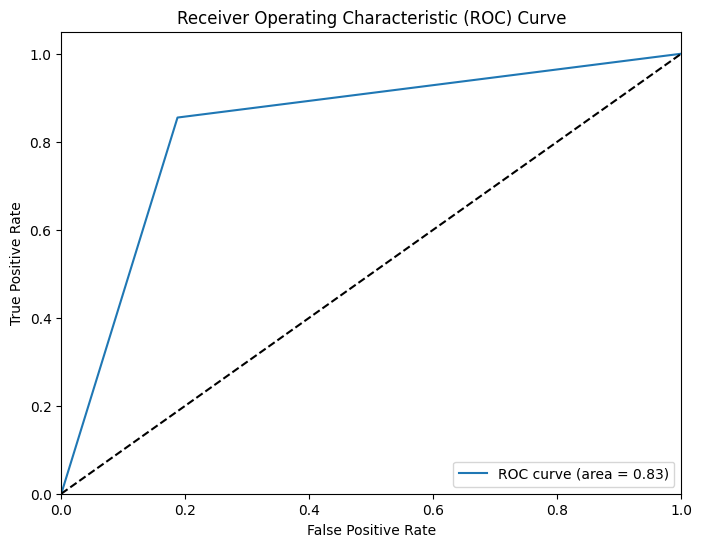

In [161]:
# Define a function to plot the ROC curve
def plot_roc_curve(actual, probabilities):
    # Calculate false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(actual, probabilities, drop_intermediate=False)
    # Calculate the area under the ROC curve
    auc_score = metrics.roc_auc_score(actual, probabilities)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Call the function to plot the ROC curve
plot_roc_curve(y_train_resampled_pred_final.Actual_Churn, y_train_resampled_pred_final.churn_pred)


#### Determining the Optimal Cutoff Point

In [167]:
# Creating columns with different probability cutoffs 
cutoffs = [float(x)/10 for x in range(10)]
for cutoff in cutoffs:
    y_train_resampled_pred_final[cutoff] = y_train_resampled_pred_final.churn_pred.map(lambda x: 1 if x > cutoff else 0)
y_train_resampled_pred_final.head()


,Actual_Churn,Predicted_Churn_Probability,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.141895,0,0,0,0,0,0,0,0,0,0,0
1,0,0.391582,0,0,0,0,0,0,0,0,0,0,0
2,0,0.347774,0,0,0,0,0,0,0,0,0,0,0
3,0,0.415121,0,0,0,0,0,0,0,0,0,0,0
4,0,0.537551,1,1,1,1,1,1,1,1,1,1,1


In [181]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_resampled_pred_final.Actual_Churn, y_train_resampled_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.833731     0.854936     0.812526
0.1          0.1  0.833731     0.854936     0.812526
0.2          0.2  0.833731     0.854936     0.812526
0.3          0.3  0.833731     0.854936     0.812526
0.4          0.4  0.833731     0.854936     0.812526
0.5          0.5  0.833731     0.854936     0.812526
0.6          0.6  0.833731     0.854936     0.812526
0.7          0.7  0.833731     0.854936     0.812526
0.8          0.8  0.833731     0.854936     0.812526
0.9          0.9  0.833731     0.854936     0.812526


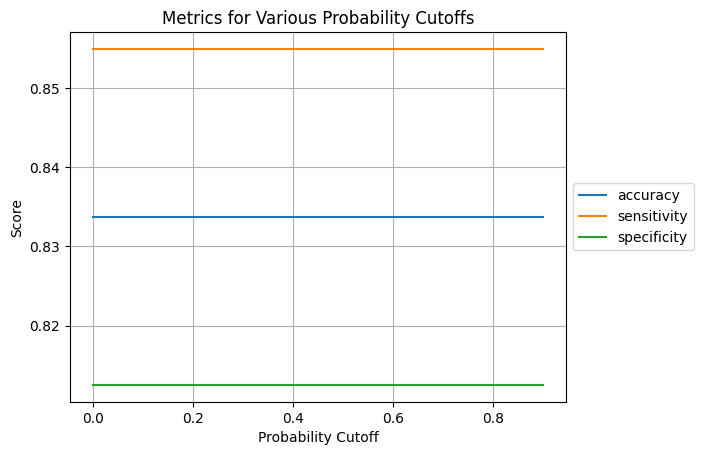

In [182]:
# Plotting accuracy, sensitivity, and specificity for various probabilities
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.title('Metrics for Various Probability Cutoffs')
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


##### Initially, we chose the classification threshold as 0.5. From the graph, it's evident that the optimal cutoff is slightly above 0.5 but below 0.6. Let's make slight adjustments within this range.

In [184]:
# Creating columns with refined probability cutoffs
numbers = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]
for i in numbers:
    y_train_resampled_pred_final[i] = y_train_resampled_pred_final.churn_pred.map(lambda x: 1 if x > i else 0)
y_train_resampled_pred_final.head()


,Actual_Churn,Predicted_Churn_Probability,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.141895,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.391582,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.347774,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.415121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.537551,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [187]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

# Iterate through different probability cutoffs
num = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]
for i in num:
    # Calculate confusion matrix
    cm = metrics.confusion_matrix(y_train_resampled_pred_final.churn_pred, y_train_resampled_pred_final[i])
    total = sum(sum(cm))
    
    # Calculate accuracy, specificity, and sensitivity
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    # Store results in DataFrame
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_df)


      probability  accuracy  sensitivity  specificity
0.50         0.50       1.0          1.0          1.0
0.51         0.51       1.0          1.0          1.0
0.52         0.52       1.0          1.0          1.0
0.53         0.53       1.0          1.0          1.0
0.54         0.54       1.0          1.0          1.0
0.55         0.55       1.0          1.0          1.0
0.56         0.56       1.0          1.0          1.0
0.57         0.57       1.0          1.0          1.0
0.58         0.58       1.0          1.0          1.0
0.59         0.59       1.0          1.0          1.0


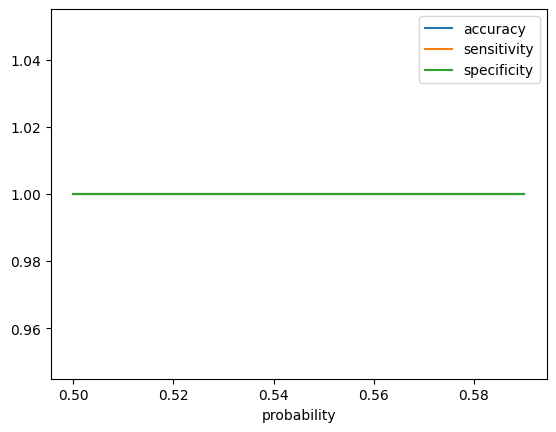

In [188]:
# Plotting accuracy, sensitivity, and specificity for various probabilities calculated above
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()


In [189]:
# Applying the determined cutoff probability to finalize the churn prediction
y_train_resampled_pred_final['final_churn_pred'] = y_train_resampled_pred_final.churn_pred.map(lambda x: 1 if x > 0.54 else 0)

# Displaying the updated churn prediction results
y_train_resampled_pred_final.head()


,Actual_Churn,Predicted_Churn_Probability,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.141895,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.391582,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.347774,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.415121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.537551,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [190]:
# Recalculating the overall accuracy of the model
print("The revised overall accuracy of the model is:", metrics.accuracy_score(y_train_resampled_pred_final.churn_pred, y_train_resampled_pred_final.final_churn_pred))


The revised overall accuracy of the model is: 1.0


In [191]:
# Calculating the confusion matrix for the revised predictions
confusion_matrix_revised = metrics.confusion_matrix(y_train_resampled_pred_final.churn_pred, y_train_resampled_pred_final.final_churn_pred)
print(confusion_matrix_revised)


[[18470     0]
 [    0 20106]]


In [195]:
TP2 = confusion_matrix_revised[1,1] # true positive 
TN2 = confusion_matrix_revised[0,0] # true negatives
FP2 = confusion_matrix_revised[0,1] # false positives
FN2 = confusion_matrix_revised[1,0] # false negatives

# Calculating sensitivity, specificity, false positive rate, precision, and true negative prediction rate for the revised predictions
sensitivity_revised = TP2 / float(TP2 + FN2)
specificity_revised = TN2 / float(TN2 + FP2)
false_positive_rate_revised = FP2 / float(TN2 + FP2)
precision_revised = TP2 / float(TP2 + FP2)
true_negative_prediction_rate_revised = TN2 / float(TN2 + FN2)

# Printing the calculated metrics
print("Sensitivity = ", sensitivity_revised)
print("Specificity = ", specificity_revised)
print("False Positive Rate = ", false_positive_rate_revised)
print("Precision = ", precision_revised)
print("True Negative Prediction Rate = ", true_negative_prediction_rate_revised)


Sensitivity =  1.0
Specificity =  1.0
False Positive Rate =  0.0
Precision =  1.0
True Negative Prediction Rate =  1.0


#### Precision and recall tradeoff

In [197]:
# Importing precision_recall_curve function from sklearn.metrics
from sklearn.metrics import precision_recall_curve


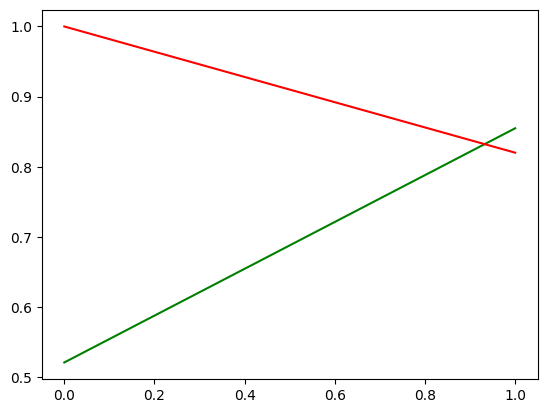

In [199]:
p, r, thresholds = precision_recall_curve(y_train_resampled_pred_final.churn_pred, y_train_resampled_pred_final.Actual_Churn)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


### Predicting on the Test Dataset

##### Preparing and Feature Selection for Test Data

In [200]:
# Scaling the test dataset
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
35865,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,...,False,False,False,True,False,False,True,False,False,False
41952,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,...,True,False,False,True,False,False,False,False,True,False
98938,0.061230,0.003275,0.037889,0.008157,0.010851,0.025458,0.018789,0.0,0.000000,0.000000,...,True,False,False,True,False,False,False,False,False,False
29459,0.042998,0.020180,0.000963,0.000297,0.001588,0.003828,0.000573,0.0,0.000000,0.000000,...,True,False,False,True,False,False,True,False,False,False
70682,0.098384,0.005699,0.011111,0.039505,0.084425,0.242612,0.135335,0.0,0.000721,0.000521,...,True,False,False,False,True,False,False,True,False,False


In [201]:
# Feature selection for the test data
X_test = X_test[rfe_columns_2]
X_test.head()


,arpu_8,roam_ic_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_t2m_mou_6,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
35865,0.026143,0.000000,0.000000,0.000000,0.000000,0.000053,0.003225,0.002782,0.009587,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
41952,0.048190,0.000000,0.000000,0.005379,0.018971,0.009067,0.002868,0.022029,0.008684,0.000000,0.020408,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
98938,0.061230,0.000000,0.000000,0.073716,0.000374,0.024987,0.055421,0.183375,0.003706,0.000000,0.035714,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
29459,0.042998,0.000000,0.000000,0.000000,0.000000,0.000800,0.002576,0.000037,0.011386,0.000000,0.025510,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
70682,0.098384,0.000721,0.031491,0.041749,0.172443,0.157573,0.028465,0.066205,0.002352,0.080257,0.061224,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [202]:
# Adding a constant to the test model
X_test_Resampled = sm.add_constant(X_test)


#### Making predictions for the target variable

In [203]:
# Predicting the target variable using the test data
y_test_pred = res.predict(X_test_Resampled)
print("\n The first ten probability values of the predictions are:\n", y_test_pred[:10])



 The first ten probability values of the predictions are:
 35865    0.773588
41952    0.478787
98938    0.000374
29459    0.130020
70682    0.008556
58317    0.231643
4860     0.007875
16890    0.707383
61329    0.658911
94332    0.457148
dtype: float64


In [204]:
# Creating a DataFrame to store the predicted probabilities
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()


,0
35865,0.773588
41952,0.478787
98938,0.000374
29459,0.130020
70682,0.008556


In [233]:
# Renaming the column to 'Conv_prob'
y_pred = y_pred.rename(columns={0: 'Converted_prob'})



In [208]:
y_test_actual = pd.DataFrame(y_test)
y_test_actual.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [209]:
# Combining the actual test target variable and the predicted probabilities
y_pred_final = pd.concat([y_test_actual, y_pred], axis=1)
y_pred_final.head()


,churn,0
35865,0,0.773588
41952,0,0.478787
98938,0,0.000374
29459,0,0.130020
70682,0,0.008556


In [235]:
# Assigning churn predictions based on a probability cutoff of 0.54
y_pred_final['test_churn_pred'] = y_pred.Converted_prob.map(lambda x: 1 if x > 0.54 else 0)
y_pred_final.head()


,churn,0,test_churn_pred
35865,0,0.773588,1
41952,0,0.478787,0
98938,0,0.000374,0
29459,0,0.130020,0
70682,0,0.008556,0


In [236]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8271303188534608

#### Evaluation of Metrics

In [237]:
# Confusion Matrix
confusion_matrix_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix:\n", confusion_matrix_test)


Confusion Matrix:
 [[6864 1408]
 [ 148  581]]


In [239]:
# Calculating model validation parameters
TP_test = confusion_matrix_test[1,1] # true positive 
TN_test = confusion_matrix_test[0,0] # true negatives
FP_test = confusion_matrix_test[0,1] # false positives
FN_test = confusion_matrix_test[1,0] # false negatives


In [240]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ", TP_test / float(TP_test + FN_test))

# Let us calculate specificity
print("Specificity = ", TN_test / float(TN_test + FP_test))

# Calculate false positive rate - predicting churn when customer does not have churned
print("False Positive Rate = ", FP_test / float(TN_test + FP_test))

# positive predictive value 
print("Precision = ", TP_test / float(TP_test + FP_test))

# Negative predictive value
print("True Negative Prediction Rate = ", TN_test / float(TN_test + FN_test))


Sensitivity =  0.7969821673525377
Specificity =  0.8297872340425532
False Positive Rate =  0.1702127659574468
Precision =  0.2921065862242333
True Negative Prediction Rate =  0.9788933257273246


#### Interpretation of the findings

In [242]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP_test / float(TP_test+FN_test),2)*100,"%")

print("\nAs the model created is based on a sensitivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n")


The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sensitivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



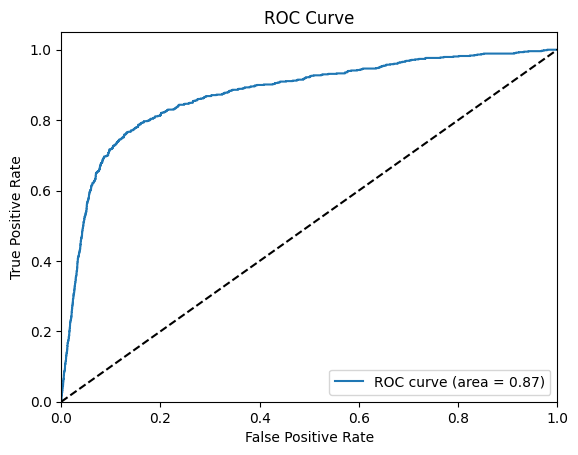

In [248]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_pred_final.churn, y_pred.Converted_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### The AUC score is 0.90 for the train dataset and 0.87 for the test dataset, indicating that the model performs well.

### Logistic Regression with Principal Component Analysis (PCA)

In [250]:
# Splitting the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# Scaling the dataset
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique to address data imbalance
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()


Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)
Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,...,True,False,False,True,False,False,False,False,False,False
1,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,...,True,False,False,True,False,False,False,False,True,False
2,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,...,True,False,False,False,True,False,True,False,False,False
3,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,0.029033,0.0,...,True,False,False,True,False,False,False,False,True,False
4,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,0.000000,0.0,...,False,False,False,False,True,False,False,True,False,False


In [251]:
# Importing PCA
from sklearn.decomposition import PCA

# Initializing PCA
pca = PCA(random_state=42)

# Applying PCA on the train data
pca.fit(X_train_sm)


PCA(random_state=42)

In [252]:
# Transforming the train data using PCA
X_train_sm_pca = pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ", X_train_sm_pca.shape)

# Transforming the test data using PCA
X_test_pca = pca.transform(X_test)
print("Dimension of X_test_pca: ", X_test_pca.shape)


Dimension of X_train_sm_pca:  (38576, 126)
Dimension of X_test_pca:  (9001, 126)


In [253]:
# Viewing the PCA components
pca.components_


array([[ 1.77573362e-02,  5.64051273e-03,  1.28602824e-02, ...,
        -7.99919202e-02,  1.99893010e-01, -4.60849741e-04],
       [ 1.14185730e-03,  1.10557492e-05,  2.58187925e-03, ...,
         6.62558101e-01, -7.18335428e-01,  2.33231772e-04],
       [ 8.33101375e-03, -2.26005821e-02, -1.47715536e-02, ...,
         8.04940450e-02,  6.67765575e-02, -3.49851833e-04],
       ...,
       [-3.99293541e-07,  1.32399478e-06, -2.18913752e-06, ...,
        -3.82907478e-08, -1.45656226e-08, -1.13595748e-08],
       [ 2.31243816e-07, -1.87004665e-06,  1.53658708e-06, ...,
        -3.71014294e-08, -2.77244864e-08, -3.90863641e-08],
       [ 0.00000000e+00, -1.29331752e-15, -9.97078397e-16, ...,
        -7.50662289e-18,  9.06686126e-19,  1.57938501e-18]])

### Logistic Regression Analysis

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initializing and fitting the logistic regression model on the PCA-transformed training data
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# Making predictions on the PCA-transformed test data
y_pred = logreg_pca.predict(X_test_pca)

# Converting the predictions into a DataFrame
y_pred_df = pd.DataFrame(y_pred)
print("Shape of y_pred_df:", y_pred_df.shape)


Shape of y_pred_df: (9001, 1)


In [255]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for y_test and y_pred:\n", conf_matrix, "\n")

# Calculating the accuracy of the logistic regression model with PCA
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model with PCA:", accuracy)


Confusion Matrix for y_test and y_pred:
 [[6753 1519]
 [ 125  604]] 

Accuracy of the logistic regression model with PCA: 0.8173536273747362


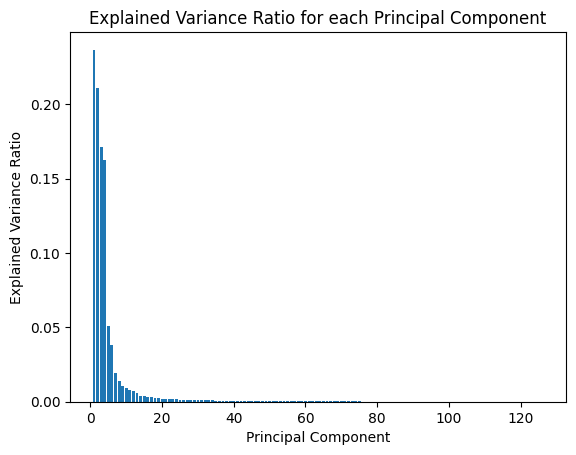

In [256]:
import matplotlib.pyplot as plt

# Plotting the explained variance ratio for each principal component
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()


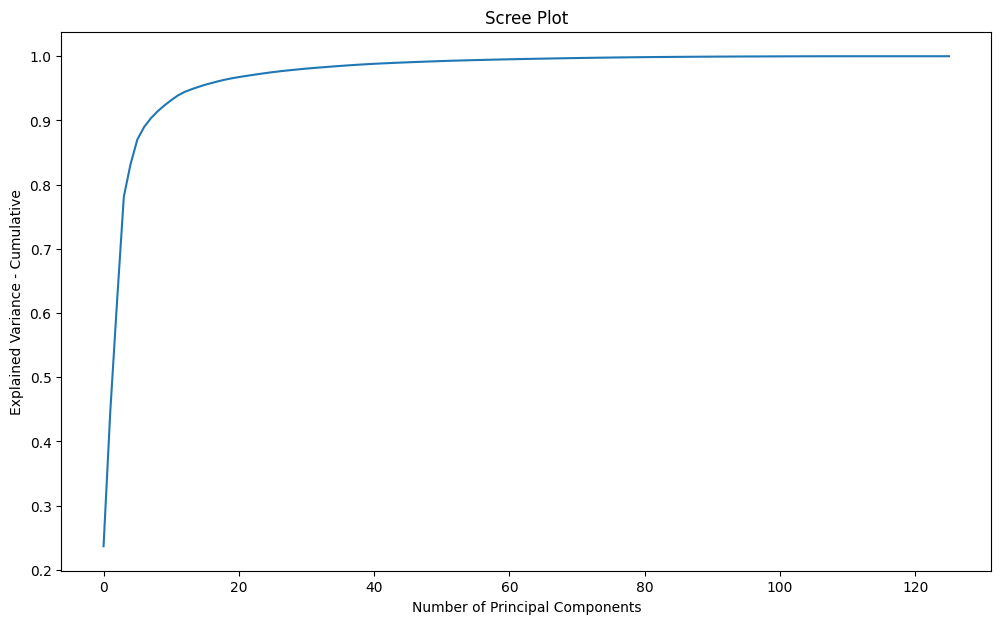

In [257]:
import numpy as np

# Calculating cumulative explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance - Cumulative')
plt.title('Scree Plot')
plt.show()


In [258]:
# Cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3) * 100)
cumulative_var_ratio

array([23.7, 44.8, 61.9, 78.2, 83.3, 87.1, 89. , 90.4, 91.5, 92.4, 93.2,
       93.9, 94.5, 94.9, 95.3, 95.6, 95.9, 96.2, 96.4, 96.6, 96.8, 97. ,
       97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2])

#### *Eight principal components can explain approximately 90% of the data.*

### Fitting the dataset with the eight explainable components

In [259]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)


Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


In [260]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# Making predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# Converting the predictions into a DataFrame
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8:", y_pred_df_8.shape)


Dimension of y_pred_df_8: (9001, 1)


In [261]:
# Checking the Confusion matrix
print("Confusion Matrix for y_test & y_pred_8\n", confusion_matrix(y_test, y_pred_8), "\n")

# Checking the Accuracy of the Predicted model
print("Accuracy of the logistic regression model with PCA:", accuracy_score(y_test, y_pred_8))


Confusion Matrix for y_test & y_pred_8
 [[6260 2012]
 [ 178  551]] 

Accuracy of the logistic regression model with PCA: 0.7566937006999223
